In [97]:
from PIL import Image
import pytesseract
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

512 320


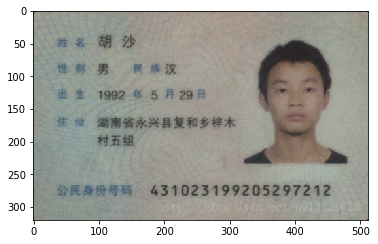

In [126]:
img_s=Image.open("D:\\tmp\\IDCard001.png")
#img_s=Image.open("D:\\tmp\\IDCard002.jpg")
print(img_s.width,img_s.height)
imshow(np.asarray(img_s))

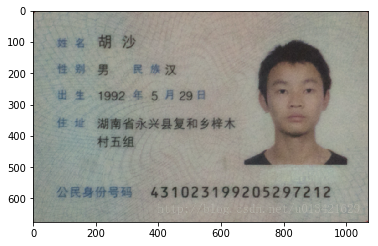

In [127]:
img_resize=img_s.resize((214*5, 135*5),Image.ANTIALIAS)
imshow(np.asarray(img_resize))

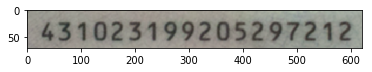

In [128]:
id_box=img_resize.copy()
id_box=(350,540,970,610)
id_region=img_resize.crop(id_box)
imshow(np.asarray(id_region))

In [129]:
#scale_rate=1
#id_region_resize=id_region.resize((id_region.width*scale_rate,id_region.height*scale_rate),Image.ANTIALIAS)

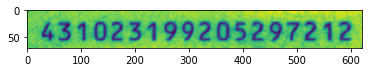

In [130]:
id_gray=id_region.convert("L")
imshow(np.asarray(id_gray))

In [131]:
###########二值化算法
def binarizing(img,threshold):
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img

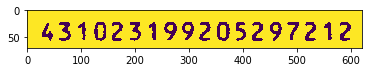

In [132]:
id_bin=binarizing(id_gray,100)
imshow(np.asarray(id_bin))

In [133]:
code = pytesseract.image_to_string(id_bin)
code

'431023199205297212'